### Import des données

In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv("clean_data.csv")

df = df.drop("bmi_categories", axis=1)
# df["smoker_age"] = df["smoker"]*df["age"]

df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,0,northwest,10600.54830
1333,18,female,31.920,0,0,northeast,2205.98080
1334,18,female,36.850,0,0,southeast,1629.83350
1335,21,female,25.800,0,0,southwest,2007.94500


In [ ]:
# Un pipeline en machine learning est une séquence d'étapes automatisées qui sont utilisées pour simplifier et optimiser le flux de travail
# de traitement des données et de construction de modèles. Il encapsule l'ensemble du processus, depuis la préparation des données jusqu'à l'évaluation du modèle final,
# en passant par les étapes intermédiaires telles que la normalisation, la transformation des variables, la sélection des caractéristiques et la formation du modèle.

In [ ]:
# Prétraitement des données : Cela inclut la manipulation des données brutes pour les préparer à être utilisées par le modèle.
# Les étapes courantes comprennent la gestion des valeurs manquantes, la normalisation des variables, la conversion des types de données, etc.

In [ ]:
# Transformation des variables : Il s'agit de convertir ou de transformer les caractéristiques d'entrée pour les rendre plus adaptées au modèle.
# Cela peut inclure des opérations telles que la création de variables indicatrices (one-hot encoding), la réduction de dimension (PCA), etc.

In [ ]:
# Construction du modèle : Définition et entraînement du modèle machine learning.

In [ ]:
# Validation du modèle : Évaluation des performances du modèle sur des données de validation ou de test
# pour s'assurer qu'il généralise bien sur de nouvelles données.

In [ ]:
# Optimisation des hyperparamètres : Ajustement des paramètres du modèle pour améliorer ses performances.

### Nettoyage/Encodage des données & pipelines, transformers, modèles...

In [2]:
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import RobustScaler, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 

from sklearn.preprocessing import PolynomialFeatures

# selection des features et de la cible
X = df.drop('charges', axis=1)
y = df.charges

# Création du train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Sélection des variables numériques
num_col = list(X.select_dtypes(include=[float,int]).columns)
# Sélection des variables catégorielles
cat_col = list(X.select_dtypes(include=[object]).columns)


# pipeline pour les valeurs numériques
# cela permet de créer une succession d'étapes (ici il n'y en a qu'une)
my_num_pipe = make_pipeline(PolynomialFeatures(2), StandardScaler())
# Créer un pipeline pour les variables catégorielles
categorical_pipeline = make_pipeline(OneHotEncoder(), PolynomialFeatures(2))


# ColumnTransformer permet de faire des opérations sur des sélections de colonnes
preprocessing = ColumnTransformer([
    ("numeric", my_num_pipe, num_col),
    ("categorical", categorical_pipeline, cat_col)
])

# preprocessing.fit(X_train)
# feature_names = preprocessing.get_feature_names_out(X.columns)
# feature_names

In [5]:
# age' (0.0): L'âge n'a apparemment aucune contribution à la prédiction de la variable cible (peut-être qu'il est exclu du modèle en raison du terme Lasso).
# 'sex' (-2516.853191426364): Une unité d'augmentation dans la variable 'sex' est associée à une diminution d'environ 2516.85 unités dans la variable cible (en supposant que toutes les autres variables restent constantes).
# 'bmi' (259.155002102034): Une unité d'augmentation dans la variable 'bmi' est associée à une augmentation d'environ 259.16 unités dans la variable cible.
# 'children' (2030.5049181589575): Une unité d'augmentation dans la variable 'children' est associée à une augmentation d'environ 2030.50 unités dans la variable cible.
# 'smoker' (-13230.800216679068): Si le patient est un fumeur (1), cela est associé à une diminution significative d'environ 13230.80 unités dans la variable cible par rapport à un non-fumeur (0).
# 'region' (682.2261542909383): La variable 'region' a une contribution positive d'environ 682.23 unités à la variable cible.
# 'bmi_categories' (8670.04922615023): La variable 'bmi_categories' a une contribution positive d'environ 8670.05 unités à la variable cible.
# 'smoker_bmi' (160.33348543225566): Une unité d'augmentation dans la variable 'smoker_bmi' est associée à une augmentation d'environ 160.33 unités dans la variable cible.

#### Voir si les données ont bien été modifiées

In [6]:
# Appliquez le pipeline sur les données d'entraînement et de test
# X_train_transformed = preprocessing.fit_transform(X_train)
# X_train_transformed

In [7]:
# # Supposez que X_train_transformed soit une matrice NumPy résultante de la transformation
# # Appliquer le ColumnTransformer sur les données d'entraînement
# X_train_transformed = preprocessing.fit_transform(X_train)

# # Obtenez les noms de colonnes après la transformation
# all_columns = preprocessing.transformers_[0][1].get_feature_names_out(cat_col).tolist() + num_col

# # Créez un DataFrame pandas à partir des données transformées et des noms de colonnes
# X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_columns)

# # Affichez le DataFrame
# print(X_train_transformed_df.head())

### DummyRegressor

In [8]:
# DUMMY REGRESSOR (ne prend pas en compte les variables, prédit la moyenne de chaque valeur Y)
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
print(f"regression dummy : {dummy_regr.score(X_test, y_test)}")

regression dummy : -0.0020162626112618653


### LinearRegression

In [9]:
# REGRESSION LINEAIRE
# j'ajoute la régression linéaire au pipeline
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())
# Je fit sur les données
my_pipe_lr.fit(X_train, y_train)
# afficher le score
print(f"regression linéaire : {my_pipe_lr.score(X_test, y_test)}")

regression linéaire : 0.8996062163854258


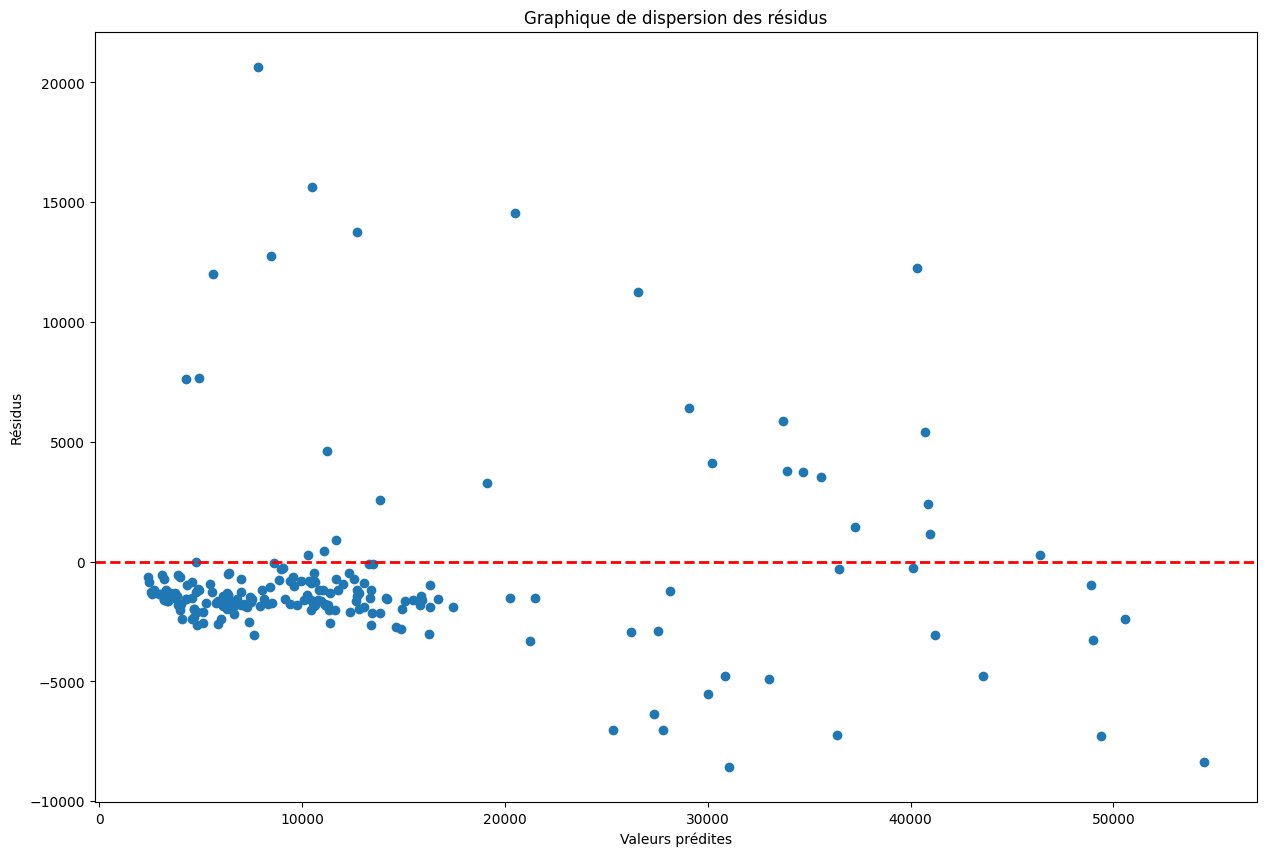

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Faire des prédictions sur les données de test
y_pred = my_pipe_lr.predict(X_test)

# Calculer les résidus
residuals = y_test - y_pred

# Tracer le graphique de dispersion entre les valeurs prédites et les résidus
plt.figure(figsize=(15,10))
plt.scatter(y_pred, residuals)
#sns.scatterplot(y_pred)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Ajouter une ligne horizontale à y=0 pour référence
plt.title('Graphique de dispersion des résidus')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()

In [ ]:
# # Faire une prédiction sur de nouvelles données
# y_pred = my_pipe_lr.predict(X_test)

# # X_new doit être un tableau ou une liste contenant les
# # caractéristiques des nouvelles données sur lesquelles vous voulez faire des prédictions.

# # Afficher les prédictions
# print("Prédictions :", y_pred)

Prédictions : [ 3389.50894763 34690.72726992  7276.05592438 40973.59793111
 30193.4281238   7383.06678389  3837.91396617  4674.97019435
  3215.10224374 40129.9678535  10240.92873434 12796.42804293
  3058.23818071 11681.53542023  2686.68647468  2391.11685051
  2585.86984359  7016.48882904  4701.06817715 20523.01185387
 14887.84595801 10119.82251032 13851.04208448 15060.08045546
  6613.1493543   4109.31099928 12656.54958784 11152.98335823
  3326.10346379  3476.02195604  4939.03977276 13440.63949193
 10918.69735933 20272.95885466 29070.91962866 48978.10548318
  4836.13719494 13386.99646475 17463.12048925 10615.2596619
  6318.71760455  6233.40502961 27550.61031575 13865.54107184
 30873.03689194  4263.4510663  11130.05707657 12022.54057295
 43574.73238114 11639.76124113  5984.81865985 40330.09530148
 16254.24325997 14623.07319158  3430.72693622 15930.83769094
  7524.20940337  9052.20583537  8870.36997099  5827.68369558
  3903.02303697 40853.42022359 12703.16539889 10431.16647735
 16291.8600

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"r2 : {r2}")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse : {rmse}")

r2 : 0.8996062163854258
rmse : 3814.268518108301


In [ ]:
# Extract coefficients from the linear regression model
coefficients = my_pipe_lr[-1].coef_
result = list(zip(feature_names, coefficients))
# for tuple in result:
#     print(tuple)

liste = []
for i in range(len(result)):
    liste.append(list([result[i][0], result[i][-1]]))

sorted(liste, reverse=False)
# feature_names = preprocessing.get_feature_names_out(X.columns)
# feature_names

NameError: name 'feature_names' is not defined

In [ ]:
# my_pipe_lr[-1].coef_
# plus le coef est gros plus l'info est importante
# coef des variables (avec polynomialfeatures)

In [ ]:
# # Extract coefficients from the linear regression model
# coefficients = my_pipe_lr[-1].coef_
# poly = PolynomialFeatures(2)
# # Extract feature names from PolynomialFeatures after fitting
# poly_feature_names = poly.get_feature_names_out(X.columns)

# # Create a DataFrame with coefficients and feature names
# coef_df = pd.DataFrame({'Feature': poly_feature_names, 'Coefficient': coefficients})

# # Display the DataFrame
# print(coef_df)

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline

# # selection des features et de la cible
# X = X
# y = y

# # Create polynomial features and linear regression
# degree = 2  # You can adjust the degree as needed
# poly = PolynomialFeatures(degree)

# # Fit the pipeline to the data
# my_pipe_lr.fit(X, y)

# # Extract coefficients from the linear regression model
# coefficients = my_pipe_lr[-1].coef_

# # Extract feature names from PolynomialFeatures
# poly_feature_names = poly.get_feature_names_out(X.columns)

# # Create a DataFrame with coefficients and feature names
# coef_df = pd.DataFrame({'Feature': poly_feature_names, 'Coefficient': coefficients})

# # Display the DataFrame
# print(coef_df)

### Lasso

In [ ]:
# REGRESSION LASSO CV
my_pipe_lasso = make_pipeline(preprocessing, Lasso(alpha=6.1)) 
# Je fit sur les données
my_pipe_lasso.fit(X_train, y_train)
# le score
print(f"regression lasso : {my_pipe_lasso.score(X_test, y_test)}")

regression lasso : 0.9009787870285388


In [ ]:
# Faire une prédiction sur de nouvelles données
y_pred = my_pipe_lasso.predict(X_test)

# X_new doit être un tableau ou une liste contenant les
# caractéristiques des nouvelles données sur lesquelles vous voulez faire des prédictions.

# Afficher les prédictions
print("Prédictions :", y_pred)

Prédictions : [ 3207.02178112 34717.07133383  7235.33418895 40932.56751109
 29831.51552114  7264.69291711  3782.00376871  4395.7677842
  3005.0511984  40089.44348443 10358.88089782 12715.14897088
  2857.58637691 12710.49640278  2524.02976313  2266.13475878
  2401.82224803  7133.43548791  4232.32007432 21095.61481192
 14710.5266025  10153.26864793 13837.49292913 14855.12343152
  6514.21855825  3632.4023525  12703.24423783 11087.79388923
  3086.2360662   3472.77126339  4728.4180409  13412.05038704
 11018.99310611 20349.58688572 29293.39444067 48886.77325177
  4472.83370005 13391.76728542 17293.63324764 10903.53789489
  6502.67728329  6217.08722776 27694.32333311 14030.55523737
 30909.10797624  4088.49220469 11108.09905581 12139.24804237
 43673.42727781 11664.17652363  5637.42974148 40089.89038679
 15973.76686782 14425.77583446  3310.89160939 15645.27062805
  7581.71127139  9356.67306798  9052.09777634  5651.25320306
  3983.88697139 40744.15314936 12699.21259827 10469.2264606
 16101.77844

In [ ]:
#from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"r2 : {r2}")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse : {rmse}")

r2 : 0.9009787870285388
rmse : 3788.1046937756646


In [ ]:
# R²

# R² mesure la proportion de la variance de la variable dépendante
# (la variable que vous essayez de prédire) qui est expliquée par le modèle.
# Une valeur de R² proche de 1.0 indique un bon ajustement du modèle aux données,
# signifiant que le modèle explique une grande partie de la variabilité de la variable dépendante.
# Dans notre cas, un R² de 0.904 suggère que votre modèle explique environ 90.4%
# de la variance dans les données de test. C'est généralement considéré comme un bon ajustement.

# RMSE

# RMSE mesure l'écart moyen entre les valeurs réelles et les valeurs prédites par le modèle.
# Il est exprimé dans les mêmes unités que la variable dépendante.
# Une valeur de RMSE plus basse indique une meilleure performance du modèle.
# Dans notre cas, un RMSE de 3730.38 indique que, en moyenne, les prédictions de notre modèle
# ont une erreur d'environ 3730.38 unités par rapport aux valeurs réelles.


# Conclusion

# En résumé, avec un R² élevé et un RMSE relativement bas,
# il semble que votre modèle de régression linéaire performe bien sur les données de test.
# Cependant, il est toujours recommandé de compléter ces scores avec
# une analyse visuelle des résidus et d'autres métriques d'évaluation,
# en fonction du contexte spécifique de votre problème.

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {"lasso__alpha" : np.arange(0.1, 10, 0.1)}

grid = GridSearchCV(my_pipe_lasso, param, cv=5)
grid.fit(X_train, y_train)

/home/utilisateur/Documents/Projets/machinelearning_assurance/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+10, tolerance: 1.315e+07
  model = cd_fast.enet_coordinate_descent(
/home/utilisateur/Documents/Projets/machinelearning_assurance/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+10, tolerance: 1.298e+07
  model = cd_fast.enet_coordinate_descent(
/home/utilisateur/Documents/Projets/machinelearning_assurance/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not conv

/home/utilisateur/Documents/Projets/machinelearning_assurance/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.454e+09, tolerance: 1.271e+07
  model = cd_fast.enet_coordinate_descent(
/home/utilisateur/Documents/Projets/machinelearning_assurance/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+10, tolerance: 1.315e+07
  model = cd_fast.enet_coordinate_descent(
/home/utilisateur/Documents/Projets/machinelearning_assurance/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not conv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('polynomialfeatures',
                                                                                          PolynomialFeatures()),
                                                                                         ('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children',
                                                                          'smoker']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['...
             param_grid={'lasso__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])})

In [ ]:
len(np.arange(0.01,10, 0.1))

100

In [ ]:
grid.best_params_

{'lasso__alpha': 6.1}

### Ridge

In [ ]:
# REGRESSION RIDGE CV 
my_pipe_ridge = make_pipeline(preprocessing, Ridge(alpha=1.0))
# Je fit sur les données
my_pipe_ridge.fit(X_train, y_train)
# le score
print(f"regression ridge : {my_pipe_ridge.score(X_test, y_test)}")

regression ridge : 0.9005507563212879


In [ ]:
from sklearn.model_selection import GridSearchCV
param = {"ridge__alpha" : np.arange(0.1, 10, 0.1)}

grid = GridSearchCV(my_pipe_ridge, param, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('polynomialfeatures',
                                                                                          PolynomialFeatures()),
                                                                                         ('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children',
                                                                          'smoker']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['...
             param_grid={'ridge__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])})

In [ ]:
grid.best_params_

{'ridge__alpha': 1.0}

### ElasticNet

In [ ]:
# REGRESSION ELASTICNETCV
my_pipe_elasticnet = make_pipeline(preprocessing, ElasticNet(alpha=0.1, l1_ratio=0.9)) # avant alpha = 0.01
# Je fit sur les données
my_pipe_elasticnet.fit(X_train, y_train)
# le score
print(f"regression elasticnet : {my_pipe_elasticnet.score(X_test, y_test)}")

# si l1_ratio = 1 alors elasticnet devient un lasso
# si l1_ratio = 0 alors elasticnet devient un ridge

regression elasticnet : 0.8949701277480728


In [ ]:
from sklearn.model_selection import GridSearchCV
param = {"elasticnet__alpha" : np.arange(0.1, 10, 0.1),
         "elasticnet__l1_ratio" : np.arange(0.1, 1, 0.1)}

grid = GridSearchCV(my_pipe_elasticnet, param, cv=5)
grid.fit(X_train, y_train)

# np.arange(0.000001, 0.0001, 0.1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('polynomialfeatures',
                                                                                          PolynomialFeatures()),
                                                                                         ('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children',
                                                                          'smoker']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['...
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'elasticnet__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [ ]:
len(np.arange(0.000001, 0.0001, 0.000001))

100

In [ ]:
grid.best_params_

{'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9}

In [ ]:
poly = PolynomialFeatures(2).fit_transform